Author: Andrew Scott

In [1]:
# Package for numerical calculations and arrays
import numpy as np

# Accessing datasets
import statsmodels.api as sm

# For dataframes
import pandas as pd

# Generating plots
import matplotlib.pyplot as plt

# Generating plots 
import seaborn as sns

# For accessing dates and times
import datetime as dt

# A magic command for helping display matplotlib plots in notebooks
%matplotlib inline

The plan is to use a real-world dataset to serve as a model for the simulated dataset. I have decided to simulate the following dataset that was originally published by Ronald Fisher that consists of cats and their gender, weight, and heart weight[x]. The dataset is part of the MASS package for the programming language R. However, these datasets can be accessed in python using the statsmodel package. https://kolesnikov.ga/Datasets_in_Python/

In [2]:
# Load the cats dataset 
cats = sm.datasets.get_rdataset(dataname='cats', package='MASS')

In [3]:
# Prnt some information about the dataset 
print(cats.__doc__)

.. container::

   ==== ===============
   cats R Documentation
   ==== ===============

   .. rubric:: Anatomical Data from Domestic Cats
      :name: anatomical-data-from-domestic-cats

   .. rubric:: Description
      :name: description

   The heart and body weights of samples of male and female cats used
   for *digitalis* experiments. The cats were all adult, over 2 kg body
   weight.

   .. rubric:: Usage
      :name: usage

   ::

      cats

   .. rubric:: Format
      :name: format

   This data frame contains the following columns:

   ``Sex``
      sex: Factor with levels ``"F"`` and ``"M"``.

   ``Bwt``
      body weight in kg.

   ``Hwt``
      heart weight in g.

   .. rubric:: Source
      :name: source

   R. A. Fisher (1947) The analysis of covariance method for the
   relation between a part and the whole, *Biometrics* **3**, 65–68.

   .. rubric:: References
      :name: references

   Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics
   with S.* F

In [4]:
# Load the cats dataset to a pandas dataframe
df_cats = cats.data

In [5]:
# View the first few rows of the dataframe
df_cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [6]:
# View the shape of the dataframe
df_cats.shape

(144, 3)

In [7]:
# View summary statistics of dataframe
df_cats.describe()

,Bwt,Hwt
count,144.000000,144.000000
mean,2.723611,10.630556
std,0.485307,2.434636
min,2.000000,6.300000
25%,2.300000,8.950000
50%,2.700000,10.100000
75%,3.025000,12.125000
max,3.900000,20.500000


In [8]:
# Show the amount of male and female cats in the dataset
df_cats['Sex'].value_counts()

M    97
F    47
Name: Sex, dtype: int64

In [9]:
# Save the original dataset
# Access the current date and time.
now = dt.datetime.now()

# Formatting the current date and time as a string and saving to a variable.
current_time = now.strftime('%Y%m%d_%H%M%S')

# A path to save the dataframe, using dt to create unique file names
path = 'cats-dataset/cats_original_'  + current_time + '.csv'

# Save pandas data frame to disk.
df_cats.to_csv(path)

The above summaries gives an overview as to the dimensions and datatypes involved. There are three variable types - a binary male/female column, and two numerical columns containing body weights and heart weights. We will have to invent a fourth column when simulating this dataset to meet the criteria of simulated dataset having at least four variables. 

Ignoring the sex for now and focusing on the numerical values, we could generate some random bodyweight and heartweight data using numpy by assuming a normal distribution for both variables, and using the summary statistics as a basis for the random data.

In [10]:
# Construct a new Generator with the default BitGenerator (PCG64)
rng = np.random.default_rng()

# Numpy randomly generated bwt
# A random example of 100 samples from a normal distribution
mu = 2.723611
sigma = 0.485307

random_bwt = rng.normal(mu, sigma, size=100)
random_bwt

array([3.53887385, 2.64234481, 2.27966558, 2.95829305, 2.88432972,
       2.24103498, 2.79642534, 3.76954795, 2.29651783, 2.92287568,
       2.14577528, 2.66172254, 3.71115486, 2.3842016 , 2.47096469,
       3.06740288, 1.92744625, 2.17793091, 3.34127147, 3.60882125,
       1.98799513, 2.74689294, 3.16800638, 3.21811613, 2.16011129,
       2.5828392 , 2.63467624, 2.37010681, 2.97142793, 3.02898181,
       2.83425732, 2.71903773, 3.5800975 , 2.28939622, 2.28125245,
       1.9710175 , 3.30795341, 2.74244661, 1.35135148, 3.12888168,
       2.88502482, 2.77855897, 2.45954963, 3.08749456, 3.11802245,
       3.01427089, 2.70339305, 3.20309995, 2.411627  , 2.07876565,
       3.20418531, 3.43918367, 2.17428005, 2.73313567, 2.64152833,
       2.49661374, 3.03098021, 2.15789645, 2.84519278, 2.55972536,
       2.13096633, 3.23960685, 2.61448778, 2.94138875, 2.36380605,
       2.71946496, 3.26893583, 2.43798778, 2.67034081, 2.69344267,
       3.09643706, 2.7652855 , 2.40895915, 1.86771919, 2.54453

In [11]:
# Numpy randomly generated hwt
# A random example of 100 samples from a normal distribution
mu = 10.630556
sigma = 2.434636

random_hwt = rng.normal(mu, sigma, size=100)
random_hwt

array([11.55169856,  8.29998191, 14.31703353, 10.50667014,  8.41068011,
       10.61702633,  9.98367626,  8.56264426,  8.97526811, 13.67327682,
        8.23327995, 14.24045818, 12.19613967,  9.32711729,  8.57230482,
        8.32494696, 18.86615331, 10.61208426, 13.18591488,  7.93568616,
        7.87224325, 12.21304238, 12.09003451, 12.48395804, 11.43512623,
        8.85477958,  9.01104526,  9.51819506, 12.70327256,  7.31873067,
       10.95959826, 11.78856025, 11.29145768,  7.27313638,  4.57864285,
       12.32593569, 12.92484375, 11.88309053,  9.5642452 , 10.69775102,
       13.20342231,  8.67836763, 11.68207806, 10.53564983, 13.92856585,
       13.59781961, 12.88168554,  3.21235673,  9.55014843,  9.70802018,
        8.87458542, 13.22291904, 11.59570769, 10.74498393, 12.9259367 ,
       12.88979043, 11.22723413, 13.51281683, 13.14842294, 15.37262909,
        6.44102671, 10.88561516,  9.85526473, 13.13921077, 12.09275106,
       12.29694355, 13.6241651 ,  7.61625634, 13.24411764, 12.16

In [12]:
# Create a new df with the random np arrays
# https://stackoverflow.com/questions/29949757/creating-pandas-dataframe-between-two-numpy-arrays-then-draw-scatter-plot
random_df = pd.DataFrame({'random_bwt':random_bwt, 'random_hwt':random_hwt})
random_df

,random_bwt,random_hwt
0,3.538874,11.551699
1,2.642345,8.299982
2,2.279666,14.317034
3,2.958293,10.506670
4,2.884330,8.410680
...,...,...
95,2.170325,11.414194
96,3.114285,11.656694
97,3.059487,13.322013
98,3.275408,10.575196


In [13]:
# View summary statistics
random_df.describe()

,random_bwt,random_hwt
count,100.000000,100.000000
mean,2.720101,11.002063
std,0.467064,2.417767
min,1.351351,3.212357
25%,2.402770,9.248099
50%,2.719251,11.263982
75%,3.067923,12.883712
max,3.769548,18.866153


We can see from the summary statistics that our random dataframe has somewhat similar summary statistics to the original. Despite this, it is not an acceptable simulation of the original dataset. This will become apparant by plotting scatterplots of the original data and the random data.

<AxesSubplot:xlabel='Bwt', ylabel='Hwt'>

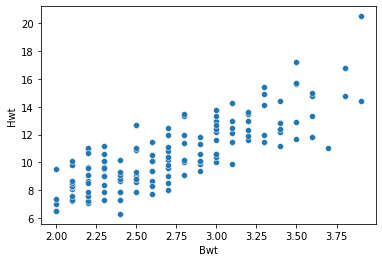

In [14]:
# scatterplot of original bwt and hwt
sns.scatterplot(data = df_cats, x = 'Bwt', y= 'Hwt')

<AxesSubplot:xlabel='random_bwt', ylabel='random_hwt'>

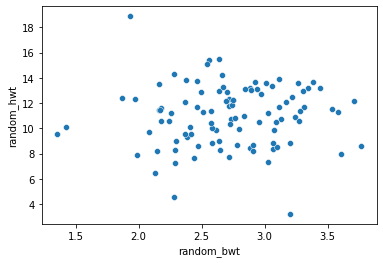

In [15]:
# scatterplot of bwt and hwt
sns.scatterplot(data = random_df, x = 'random_bwt', y= 'random_hwt')

As we can see, there appears to be a positive correlation between a cat's bodyweight and heartweight, whereas in the random dataframe there is little correlation. Thsi can also be shown numerically. 

In [16]:
# Show the correlation bodyweight and heartweight
df_cats.corr()

,Bwt,Hwt
Bwt,1.000000,0.804127
Hwt,0.804127,1.000000


In [17]:
# Show the correlation bodyweight and heartweight
random_df.corr()

,random_bwt,random_hwt
random_bwt,1.000000,0.040726
random_hwt,0.040726,1.000000


This means that in general, lighter cats have lighter hearts and heavier cats have heavier hearts. While 0.8 is a very sreong correlation[x], it is not perfect. There are some rather rare instances where a cat has a heavier heart than another cat that have a higher bodyweight. For that reason, it will not suffice to just sort the random values so that the lightest cat is matched with the lightest heart all the way up to the heaviest cat and the heaviest heart. Further investigation in to the original dataset might provide clues as to how best to proceed. 

As the sex of the cat may impact the other variables, it would be a good idea to also look at the summary statistics for each sex. The idea to use both groupby and describe in the same line of code came from https://stackoverflow.com/questions/42579148/get-columns-describe-from-group-by.

In [18]:
# View summary statistics for each sex
df_cats.groupby(['Sex']).describe()

Bwt                                                 Hwt             \
    count      mean       std  min   25%  50%  75%  max count       mean   
Sex                                                                        
F    47.0  2.359574  0.273988  2.0  2.15  2.3  2.5  3.0  47.0   9.202128   
M    97.0  2.900000  0.467484  2.0  2.50  2.9  3.2  3.9  97.0  11.322680   

                                            
          std  min   25%   50%   75%   max  
Sex                                         
F    1.357666  6.3  8.35   9.1  10.1  13.0  
M    2.542288  6.5  9.40  11.4  12.8  20.5

The standard deviations of the male values for body weight and heart weight are much higher than for females, suggesting there is typically a greater variation in male sizes, whereas females tend to be more similar in body and heart weights to one another. 

It it will be helpful to plot the dataset to visualise the distributions of each variable. It will help to decide if the assumption of normally distributed data is justified. 

<AxesSubplot:xlabel='Bwt', ylabel='Count'>

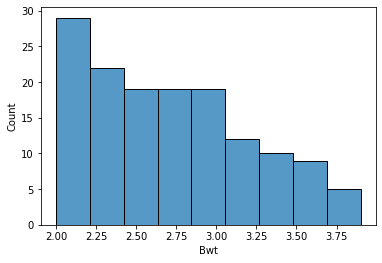

In [19]:
# Plotting the body weight
sns.histplot(data = df_cats, x = 'Bwt')

<AxesSubplot:xlabel='Bwt', ylabel='Count'>

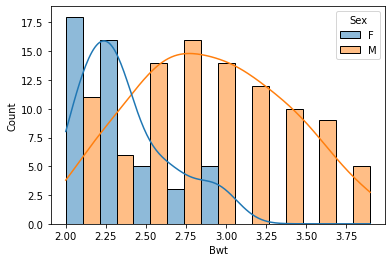

In [20]:
# Plotting the bodyweight by sex
sns.histplot(data = df_cats, x = 'Bwt', hue = 'Sex', multiple="dodge", kde=True)

<AxesSubplot:xlabel='Hwt', ylabel='Count'>

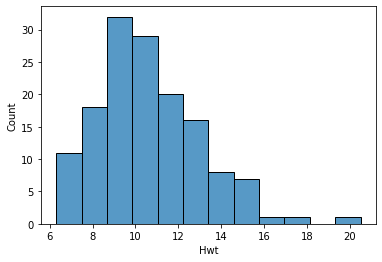

In [21]:
# Plotting the heart weight
sns.histplot(data = df_cats, x = 'Hwt')

<AxesSubplot:xlabel='Hwt', ylabel='Count'>

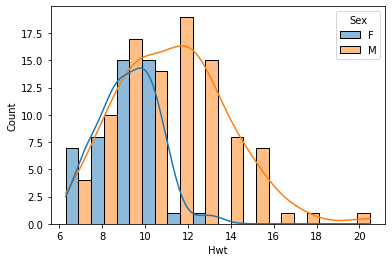

In [22]:
# Plotting the heart weight by sex
sns.histplot(data = df_cats, x = 'Hwt', hue = 'Sex', multiple="dodge", kde=True)

Both the summary statistics and the plots suggest that sex has an influence over the distribution of the variables. 
The male datapoints appear to come close to the bell-shaped curve of a normal distribution, whereas the female datapoints seem to skew slightly.

It might be a good idea to create two new dataframes containing the data for each sex.

In [23]:
# https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
# New df for each sex
df_cats_female = df_cats.loc[df_cats['Sex'] == 'F']
df_cats_male = df_cats.loc[df_cats['Sex'] == 'M']

In [63]:
df_cats_female.corr()

,Bwt,Hwt
Bwt,1.00000,0.53205
Hwt,0.53205,1.00000


In [64]:
df_cats_male.corr()

,Bwt,Hwt
Bwt,1.00000,0.79303
Hwt,0.79303,1.00000


It is interesting to note that while both males and females have a strong positive correlation between bodyweight and heartweight, the correlation is much higher in males than females.

We can use a statistical test for normality. 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/ recommends using Shapiro–Wilk test when sample sizes are under 50, which is the case with female samples. It can also be used for samples above 50, however, so it can also be used to test the male data also.

The Shapiro-Wilk tests a null hypothesis that the data comes from a normal distribution. If the p-value is greater that 0.05, then the test fails to reject that null hypothesis. 

In [24]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test on male body weight
shapiro(df_cats_male['Bwt'])

ShapiroResult(statistic=0.9788321852684021, pvalue=0.11895745247602463)

In [25]:
#perform Shapiro-Wilk test on male heart weight
shapiro(df_cats_male['Hwt'])

ShapiroResult(statistic=0.9772655963897705, pvalue=0.09039346873760223)

In [26]:
#perform Shapiro-Wilk test on female body weight
shapiro(df_cats_female['Bwt'])

ShapiroResult(statistic=0.8909613490104675, pvalue=0.0003754299250431359)

In [27]:
#perform Shapiro-Wilk test on female heart weight
shapiro(df_cats_female['Hwt'])

ShapiroResult(statistic=0.9787967205047607, pvalue=0.5434856414794922)

These test results suggest that we can assume that male body weights, heart weights, and female heart weights were drawn from a normal distribution. However, the p-value for female body weights suggests that we can assume that this data is not normally distributed. This is unusual, as weights are often normally distributed[x]. This may be a false result due to the low sample size https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/ 

We could transform this data so it produces more of a normal distribution. https://www.statology.org/box-cox-transformation-python/

In [28]:
#perform Box-Cox transformation on original data
from scipy.stats import boxcox 
transformed_data, best_lambda = boxcox(df_cats_female['Bwt']) 

<AxesSubplot:ylabel='Count'>

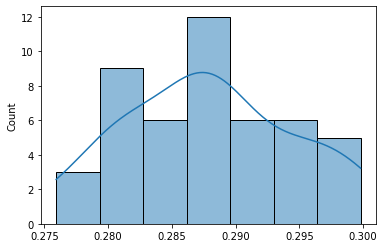

In [29]:
#plot the distribution of the transformed data values
sns.histplot(transformed_data, kde=True) 

The transformed data can now be sampled from a normal distribution, and then transformed back to scale using inverse Box-Cox https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.inv_boxcox.html

In [37]:
# Use pandas to get summary statistics for the transformed data
pd.DataFrame(transformed_data).describe()

,0
count,47.000000
mean,0.287894
std,0.006621
min,0.275920
25%,0.282643
50%,0.287809
75%,0.292722
max,0.299788


In [42]:
# Transformed female bodyweight randomly generated
mu = 0.287894
sigma = 0.006621

random_female_bwt_t = rng.normal(mu, sigma, size=100)

In [43]:
random_female_bwt_t

array([0.28878377, 0.28958444, 0.26853676, 0.28655226, 0.27448051,
       0.28130158, 0.28661225, 0.27942085, 0.29387669, 0.28118227,
       0.28152387, 0.27900451, 0.28215677, 0.28344343, 0.28880412,
       0.29178321, 0.29438919, 0.28921157, 0.29007345, 0.28970427,
       0.30156804, 0.29437209, 0.28225145, 0.28364332, 0.28503576,
       0.28089949, 0.29138484, 0.27453006, 0.29443891, 0.28587643,
       0.29099762, 0.28503601, 0.28302726, 0.29546292, 0.27814304,
       0.28719854, 0.28013559, 0.2933481 , 0.28050238, 0.28712665,
       0.30027532, 0.28678189, 0.2921955 , 0.27969501, 0.28824821,
       0.28531981, 0.29443257, 0.28369764, 0.28093899, 0.28812707,
       0.2916646 , 0.29228987, 0.30564085, 0.27576878, 0.2897945 ,
       0.29397718, 0.29043511, 0.29269418, 0.29394729, 0.29516335,
       0.29319939, 0.29835096, 0.29574656, 0.28710991, 0.29273233,
       0.28941245, 0.29022225, 0.27788826, 0.29341476, 0.28408261,
       0.27593245, 0.28852467, 0.29216164, 0.28366058, 0.30177

To inverse the Box-Cox transformation we need to find the lambda used in the original transformation

In [44]:
# Display lambda
best_lambda

-3.240870600964595

In [45]:
# Inverse Box-Cox transformation to transform random data to original scale
from scipy.special import inv_boxcox
random_female_bwt = inv_boxcox(random_female_bwt_t, best_lambda)

In [46]:
# have a look at the transformed data
random_female_bwt

array([2.33441144, 2.36437295, 1.87803238, 2.25865425, 1.97354452,
       2.11434449, 2.26055744, 2.07125985, 2.55907076, 2.11149697,
       2.11969362, 2.06221241, 2.13524376, 2.16841526, 2.33515328,
       2.45595472, 2.58728007, 2.35021821, 2.38349807, 2.36899944,
       3.21748967, 2.5863175 , 2.13761197, 2.1737682 , 2.21268543,
       2.10481251, 2.43823411, 1.97443089, 2.59008812, 2.23767181,
       2.42151719, 2.21269249, 2.15744697, 2.65096014, 2.04401092,
       2.27952361, 2.08719302, 2.5312946 , 2.0955747 , 2.2771617 ,
       3.0533789 , 2.26597657, 2.47488402, 2.07731045, 2.31524275,
       2.2209953 , 2.5897295 , 2.1752326 , 2.1057408 , 2.3109985 ,
       2.45062128, 2.47930488, 4.2130015 , 1.99715133, 2.37250835,
       2.5644997 , 2.39807386, 2.49863168, 2.56287971, 2.63252439,
       2.52370751, 2.86278517, 2.66893116, 2.27661319, 2.50048846,
       2.357799  , 2.3894496 , 2.03875665, 2.53472736, 2.18573238,
       2.00023742, 2.32505419, 2.47330616, 2.17423294, 3.24814

In [48]:
# Have a look at the descriptive stats of the random female Bwt data
# Original 47 samples had a mean of 2.359574 and a std of 0.273988
pd.DataFrame(random_female_bwt).describe()

,0
count,100.000000
mean,2.370983
std,0.330380
min,1.872136
25%,2.142408
50%,2.329733
75%,2.525604
max,4.213001


### Generating random data using Copulas - https://sdv.dev/Copulas/tutorials/00_Quickstart.html

In [30]:
from copulas.multivariate import GaussianMultivariate

copula = GaussianMultivariate()

In [31]:
df_test = df_cats[['Bwt', 'Hwt']]

In [32]:
copula.fit(df_test)

C:\Users\disco\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\disco\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\disco\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\disco\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [33]:
num_samples = 1000

synthetic_data = copula.sample(num_samples)
synthetic_data

,Bwt,Hwt
0,2.900606,12.849959
1,3.306608,12.513591
2,2.479074,8.547575
3,2.829289,10.558515
4,2.695678,9.789802
...,...,...
995,2.643960,10.471471
996,2.617346,12.405955
997,3.081773,10.498928
998,2.407719,8.242127


In [34]:
synthetic_data.describe()

,Bwt,Hwt
count,1000.000000,1000.000000
mean,2.727882,10.590522
std,0.486153,2.350903
min,2.000561,5.727437
25%,2.314288,8.787589
50%,2.677992,10.290810
75%,3.082670,12.052472
max,3.897065,19.353621
